# Univariate linear regression model

### Importing corresponding libraries

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

### Loading the data

In [2]:
df = pd.read_csv("data.csv")
df.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0.5, 1.0, 'Scatter plot')

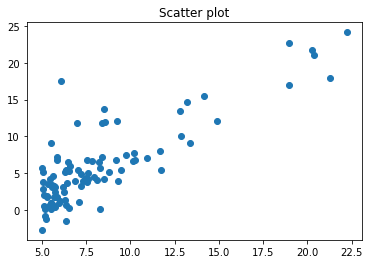

In [16]:
plt.plot(df.X, df.Y, 'o')
plt.title("Scatter plot")

### Linear Regression model class

In [3]:
class LinearRegression:
    def __init__(self, m=0, b=0, beta=.023):
        self.m = m
        self.b = b
        self.beta = beta

    def train(self, X, Y, iters=600):
        n = X.shape[0]
        for _ in tqdm(range(iters)):
            m = 0
            b = 0
            for x, y in zip(X, Y):
                y_predict = self.predict(x)
                b += self.beta * (y_predict - y)
                m += self.beta * (y_predict - y) * x
            self.b -= b/n
            self.m -= m/n

    def predict(self, x):
        return self.m * x + self.b
    
    def show_coefficients(self):
        print(f"Intersection: {self.b} \nSlope: {self.m}")

In [4]:
model = LinearRegression()
model.train(df.X.to_numpy(), df.Y.to_numpy())

100%|██████████████████████████████████████████████████████████████████████████████| 600/600 [00:00<00:00, 4580.48it/s]


In [5]:
model.show_coefficients()

Intersection: -3.567077588883142 
Slope: 1.1600118333815632


In [7]:
print(f"Prediction: {model.predict(9.7687)} \nReal value: 7.5435")

Prediction: 7.764730007871336 
Real value: 7.5435


### Plotting the fitted line

Text(0.5, 1.0, 'Fitted line')

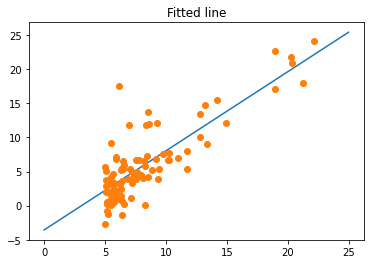

In [20]:
X_predict = np.linspace(0, 25, 100)
plt.plot(X_predict, model.predict(X_predict))
plt.plot(df.X, df.Y, 'o')
plt.title("Fitted line")